## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll learn how to use _decision trees_ and _random forests_ to solve a real-world problem from [Kaggle](https://kaggle.com/datasets):

> **QUESTION**: The [Rain in Australia dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:
> 
> ![](https://i.imgur.com/5QNJvir.png)
>
> As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow. 
>
>
> ![](https://i.imgur.com/KWfcpcO.png)


In [1]:
!pip install opendatasets pandas numpy scikit-learn jovian --quiet

In [2]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the data

In [3]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in ".\weather-dataset-rattle-package" (use force=True to force download)


In [4]:
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

## Prepare the data for training

1. Training, validation and test sets

<AxesSubplot:title={'center':'No. of rows per year'}, xlabel='Date', ylabel='count'>

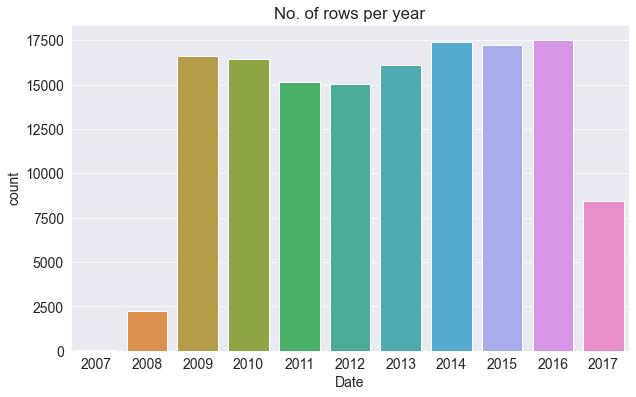

In [8]:
plt.title('No. of rows per year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [9]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [10]:
print('train_df.shape: ', train_df.shape)
print('val_df.shape: ', val_df.shape)
print('test_df.shape: ', test_df.shape)

train_df.shape:  (98988, 23)
val_df.shape:  (17231, 23)
test_df.shape:  (25974, 23)


## Input and Target Columns

In [11]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [12]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy() 

In [13]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [14]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

Identify numeric and categorical columns

In [15]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

## Imputing missing numeric and categorical values

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
imputerNumeric = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])

In [18]:
train_inputs[numeric_cols] = imputerNumeric.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputerNumeric.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputerNumeric.transform(test_inputs[numeric_cols])

In [19]:
imputerCategorical = SimpleImputer(strategy='most_frequent').fit(raw_df[categorical_cols])

In [20]:
raw_df[categorical_cols] = imputerCategorical.transform(raw_df[categorical_cols])

train_inputs[categorical_cols] = imputerCategorical.transform(train_inputs[categorical_cols])
val_inputs[categorical_cols] = imputerCategorical.transform(val_inputs[categorical_cols])
test_inputs[categorical_cols] = imputerCategorical.transform(test_inputs[categorical_cols])

In [21]:
train_inputs[numeric_cols + categorical_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Location         0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
dtype: int64

## Scaling Numeric Features

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [24]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

## Encode categorical Data

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

In [27]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [28]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [29]:
train_inputs.shape

(98988, 120)

In [30]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

## Training and visualizing decision trees

A decision tree represents a hierarchical series of binary decisions

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model = DecisionTreeClassifier(random_state=42)

In [33]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

## Evaluation

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
train_preds = model.predict(X_train)

In [36]:
pd.value_counts(train_preds)

No     76707
Yes    22281
dtype: int64

In [37]:
accuracy_score(train_preds, train_targets)

0.9999797955307714

In [38]:
train_probs = model.predict_proba(X_train)

In [39]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [40]:
val_probs = model.score(X_val, val_targets)

In [41]:
val_probs

0.7913063664325924

This phenomenon is called overfitting, where the model has learned the training examples perfect, and doesn't generalize well on other examples

## Visualization

In [42]:
from sklearn.tree import plot_tree, export_text

[Text(2232.0, 951.3000000000001, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(1116.0, 679.5, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(558.0, 407.70000000000005, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]'),
 Text(279.0, 135.89999999999998, '\n  (...)  \n'),
 Text(837.0, 135.89999999999998, '\n  (...)  \n'),
 Text(1674.0, 407.70000000000005, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(1395.0, 135.89999999999998, '\n  (...)  \n'),
 Text(1953.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3348.0, 679.5, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(2790.0, 407.70000000000005, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(2511.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3069.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3906.0, 407.70000000000005, 'Rainfall <=

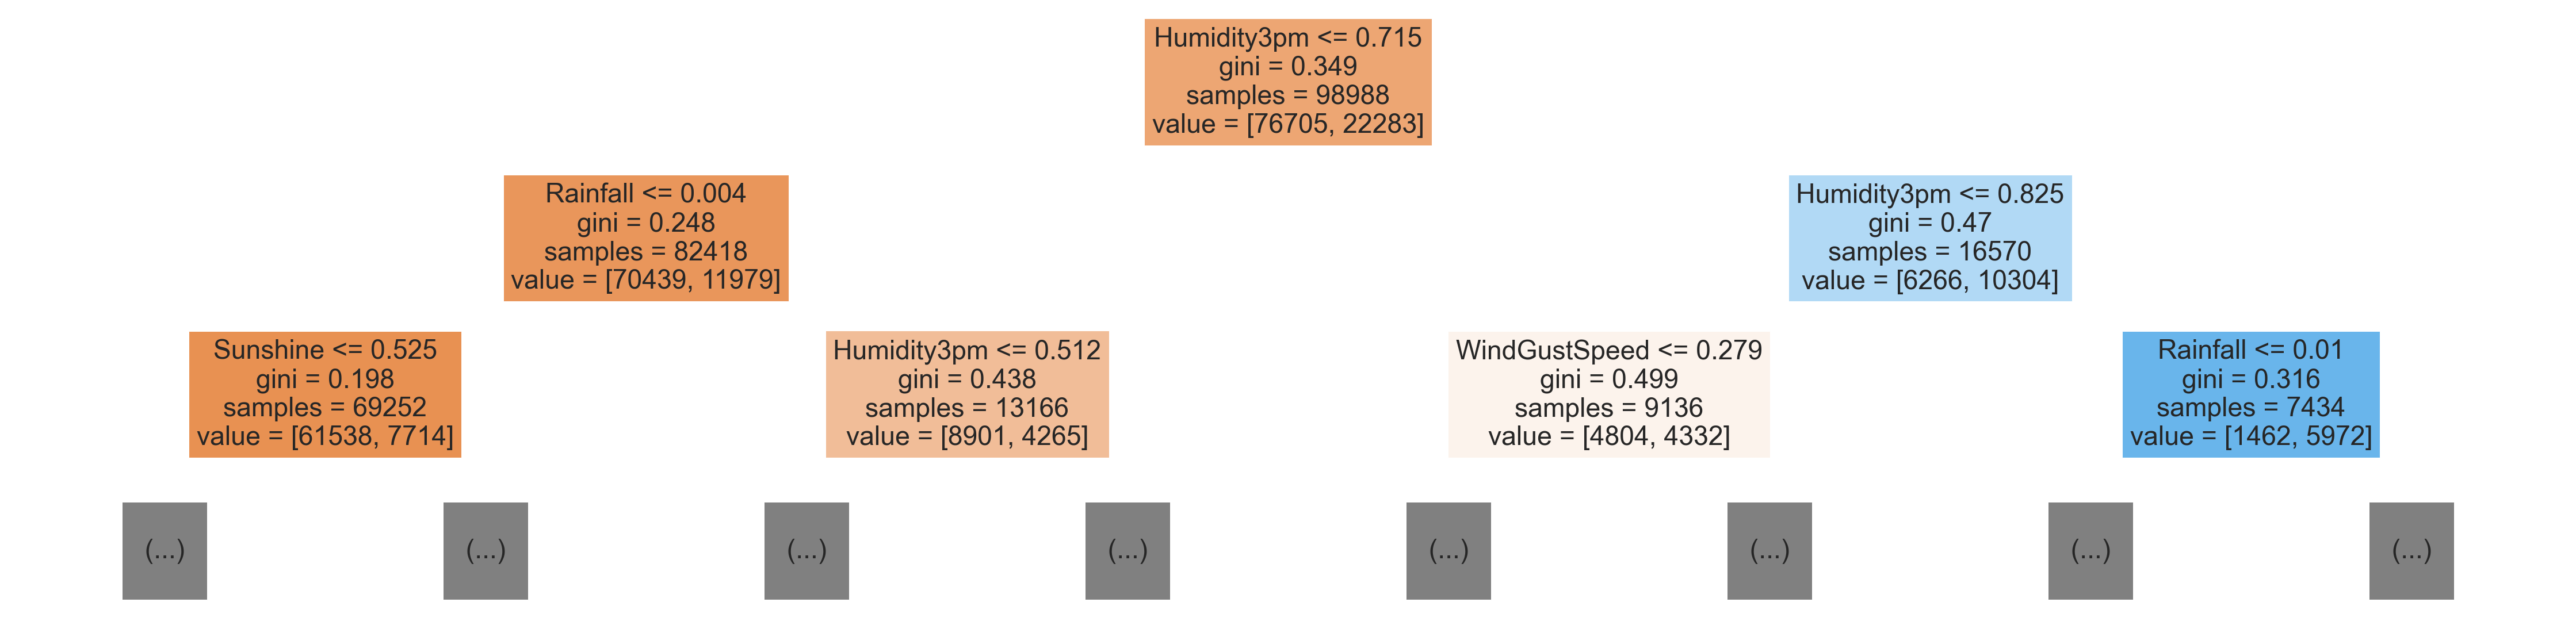

In [43]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True)

### How a decision tree is created

Gini score to each node (loss function used by the decision tree to decide which column should be used for splitting the data)

A lower gini index indicates a better split. A perfect split has a gini of 0

We had 100% accuracy on the training set because the model "memorized" the training set onto the tree

### Feature importance

Based on gini index computation, a decision tree assigns importance value to each feature

In [44]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [45]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.261677
11,Pressure3pm,0.063025
2,Rainfall,0.059656
5,WindGustSpeed,0.055431
4,Sunshine,0.049485
8,Humidity9am,0.039677
0,MinTemp,0.036452
14,Temp9am,0.034214
10,Pressure9am,0.033536
15,Temp3pm,0.031271


## Hyperparameter Tuning and Overfitting

The ``DecisionTreeClassifier`` accepts several arguments, some of which can me modified to reduce overfitting. Process of reducing overfitting -> regularlization

In [46]:
?DecisionTreeClassifier

In [47]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [48]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [49]:
model.score(X_train, train_targets)

0.8291308037337859

In [50]:
model.score(X_val, val_targets)

0.8334397307178921

In [51]:
model.classes_

array(['No', 'Yes'], dtype=object)

[Text(2232.0, 951.3000000000001, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(1116.0, 679.5, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]\nclass = No'),
 Text(558.0, 407.70000000000005, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]\nclass = No'),
 Text(279.0, 135.89999999999998, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(837.0, 135.89999999999998, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(1674.0, 407.70000000000005, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(1395.0, 135.89999999999998, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(1953.0, 135.89999999999998, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(3348.0, 679.5, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Tex

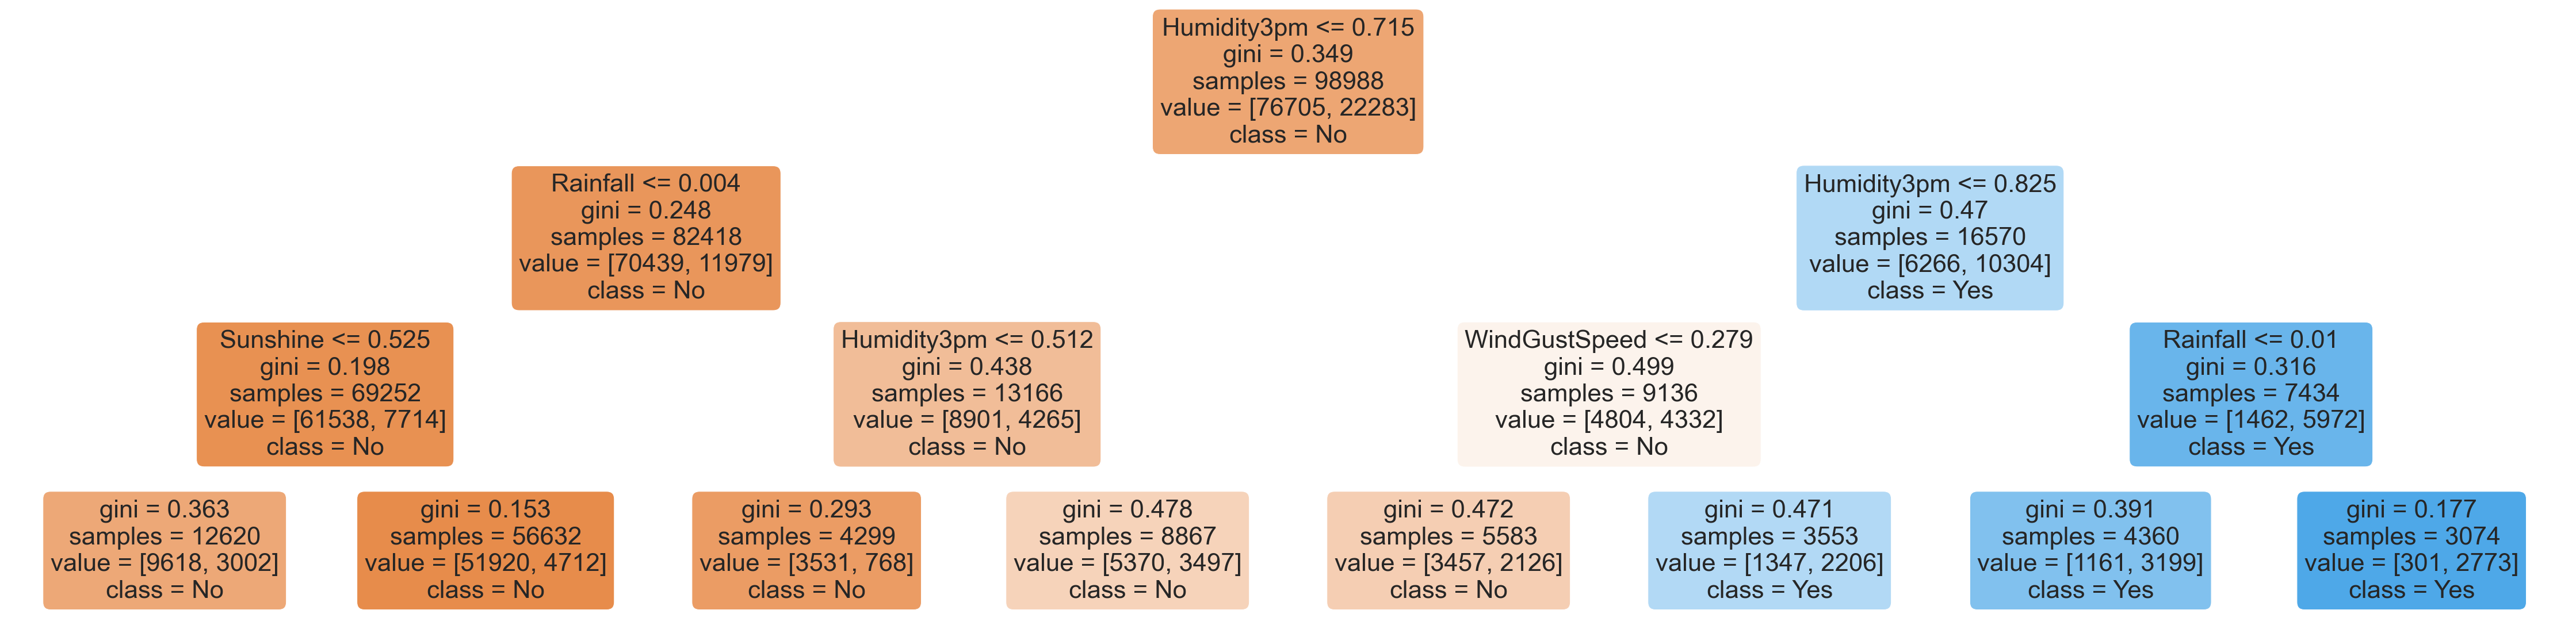

In [52]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_)

Let's experiment with different depths using a helper function

In [53]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [54]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

In [55]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156211,0.157275
6,7,0.153231,0.154721
7,8,0.147715,0.157391
8,9,0.140896,0.156636
9,10,0.132854,0.157623


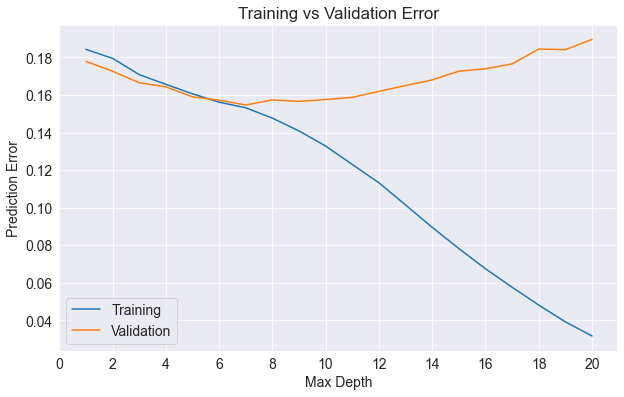

In [56]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs Validation Error')
plt.xticks(range(0,21,2))
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error')
plt.legend(['Training', 'Validation'])

When max_depth is set to 7 is the sweet spot between underfitting and overfitting

In [57]:
model = DecisionTreeClassifier(max_depth=7,random_state=42).fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8467693053703479, 0.8452788578724392)

Now we are going to experiment with the size of the leaf nodes. The decision tree decides which is the best node to split

In [58]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [59]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [60]:
model.score(X_train, train_targets)

0.8481836182163495

In [61]:
model.score(X_val, val_targets)

0.8444083338169578

In [62]:
model.tree_.max_depth

12

In [63]:
def max_depth_max_leaf_nodes_acc(md, ml):
    model = DecisionTreeClassifier(max_depth=md, max_leaf_nodes=ml, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = model.score(X_train, train_targets)
    val_acc = model.score(X_val, val_targets)
    return {'Max Depth': md, 'Max leaf nodes': ml, 'Training Acc': train_acc, 'Validation Acc': val_acc}

In [64]:
#best_result = {'Validation Acc': 0}
#for i in range (6,12):
#    print(i)
#    for j in range(10,500,30):
#        result = max_depth_max_leaf_nodes_acc(i, j)
#        if(result['Validation Acc'] > best_result['Validation Acc']):
#            best_result = result

In [65]:
#best_result

NameError: name 'best_result' is not defined

## Training a Random Forest

A more effective strategy than tuning hyperparamters of a single decision tree, it is more effective to combine results fo several decision trees -> Random forest

Takes the results of multiple decision trees and combines them

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

``n_jobs`` allows the random forest to use multiple parallel workers to train decision trees. When set to -1 it can parallelize jobs

In [70]:
%%time
model.fit(X_train,train_targets)

Wall time: 3.69 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [71]:
model.score(X_train, train_targets)

0.9999595910615429

In [72]:
model.score(X_val, val_targets)

0.8571760199640184

Training accuracy is almost 100%, but this time the validation accuracy is much better. This technique of combining the results of many models is called ensembling

In [73]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.97, 0.03],
       [0.99, 0.01],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.92, 0.08]])

In [74]:
len(model.estimators_)

100

In [75]:
model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

[Text(2232.0, 951.3000000000001, 'Location_Walpole <= 0.5\ngini = 0.347\nsamples = 62607\nvalue = [76887, 22101]\nclass = No'),
 Text(1116.0, 679.5, 'RainToday_No <= 0.5\ngini = 0.344\nsamples = 61376\nvalue = [75608, 21443]\nclass = No'),
 Text(558.0, 407.70000000000005, 'Temp3pm <= 0.362\ngini = 0.497\nsamples = 13434\nvalue = [11494, 9817]\nclass = No'),
 Text(279.0, 135.89999999999998, '\n  (...)  \n'),
 Text(837.0, 135.89999999999998, '\n  (...)  \n'),
 Text(1674.0, 407.70000000000005, 'WindDir3pm_N <= 0.5\ngini = 0.26\nsamples = 47942\nvalue = [64114, 11626]\nclass = No'),
 Text(1395.0, 135.89999999999998, '\n  (...)  \n'),
 Text(1953.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3348.0, 679.5, 'WindSpeed9am <= 0.162\ngini = 0.449\nsamples = 1231\nvalue = [1279, 658]\nclass = No'),
 Text(2790.0, 407.70000000000005, 'WindDir9am_ENE <= 0.5\ngini = 0.42\nsamples = 1043\nvalue = [1148, 493]\nclass = No'),
 Text(2511.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3069.0, 135.89999999

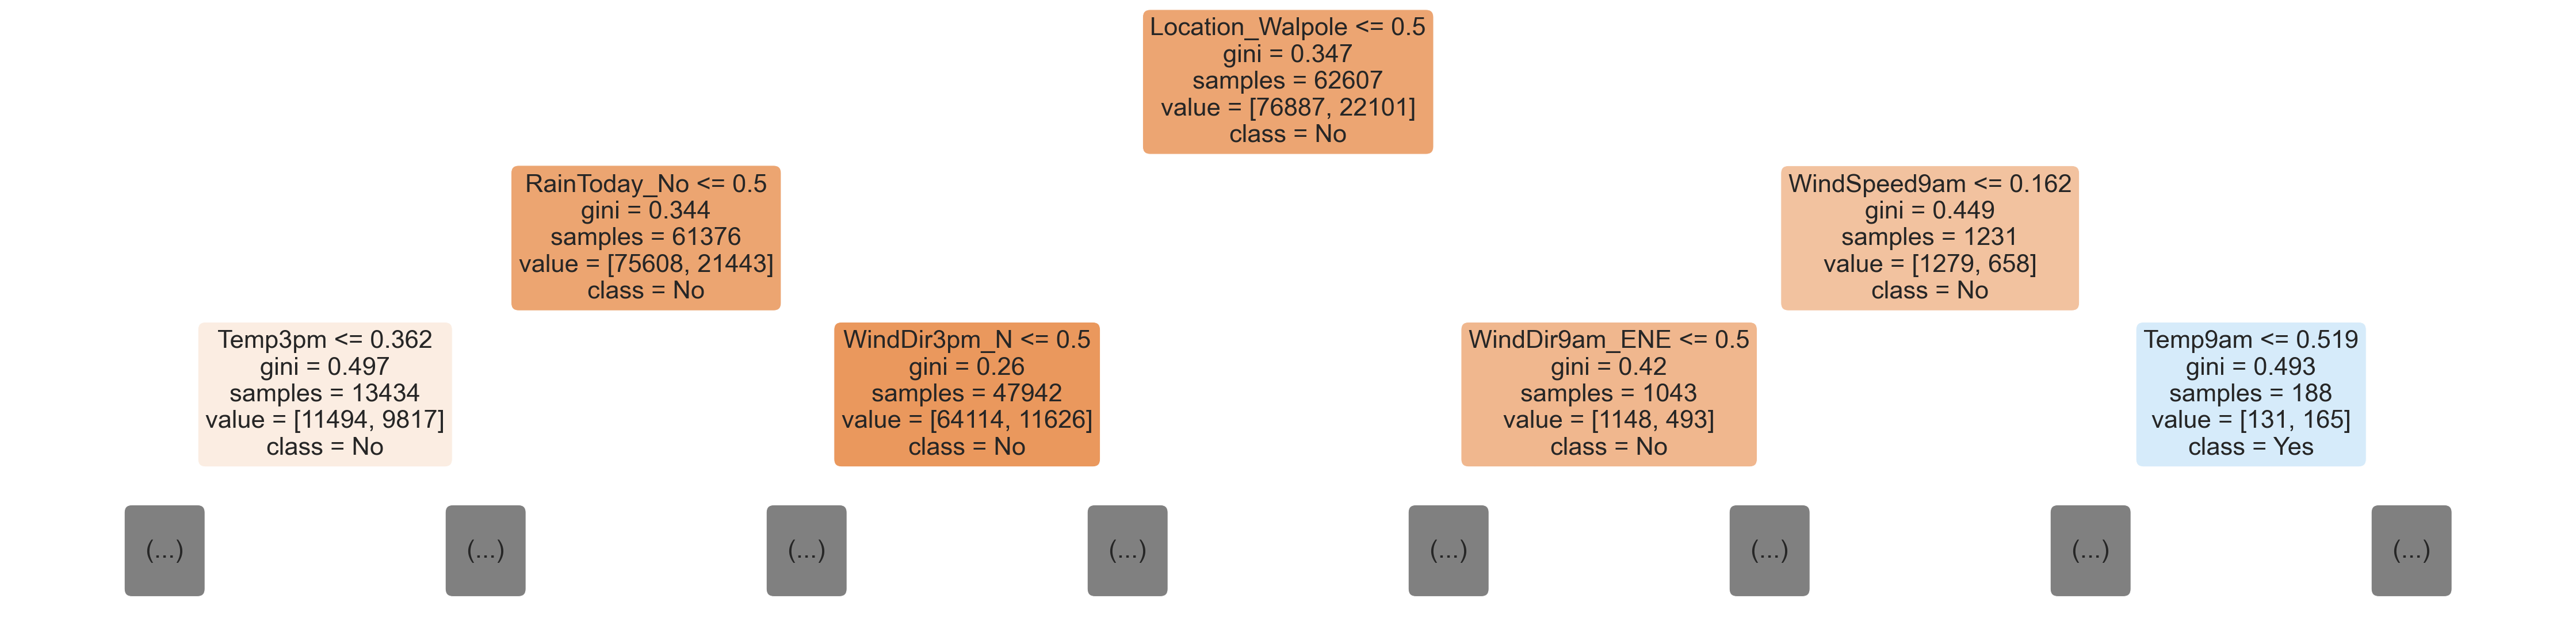

In [76]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_)

[Text(2232.0, 951.3000000000001, 'Rainfall <= 0.002\ngini = 0.349\nsamples = 62448\nvalue = [76707, 22281]\nclass = No'),
 Text(1116.0, 679.5, 'WindDir9am_E <= 0.5\ngini = 0.248\nsamples = 46216\nvalue = [62533, 10632]\nclass = No'),
 Text(558.0, 407.70000000000005, 'Pressure3pm <= 0.506\ngini = 0.255\nsamples = 42833\nvalue = [57606, 10144]\nclass = No'),
 Text(279.0, 135.89999999999998, '\n  (...)  \n'),
 Text(837.0, 135.89999999999998, '\n  (...)  \n'),
 Text(1674.0, 407.70000000000005, 'Pressure9am <= 0.563\ngini = 0.164\nsamples = 3383\nvalue = [4927, 488]\nclass = No'),
 Text(1395.0, 135.89999999999998, '\n  (...)  \n'),
 Text(1953.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3348.0, 679.5, 'WindSpeed3pm <= 0.333\ngini = 0.495\nsamples = 16232\nvalue = [14174, 11649]\nclass = No'),
 Text(2790.0, 407.70000000000005, 'Cloud3pm <= 0.722\ngini = 0.491\nsamples = 13572\nvalue = [12246, 9380]\nclass = No'),
 Text(2511.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3069.0, 135.8999999

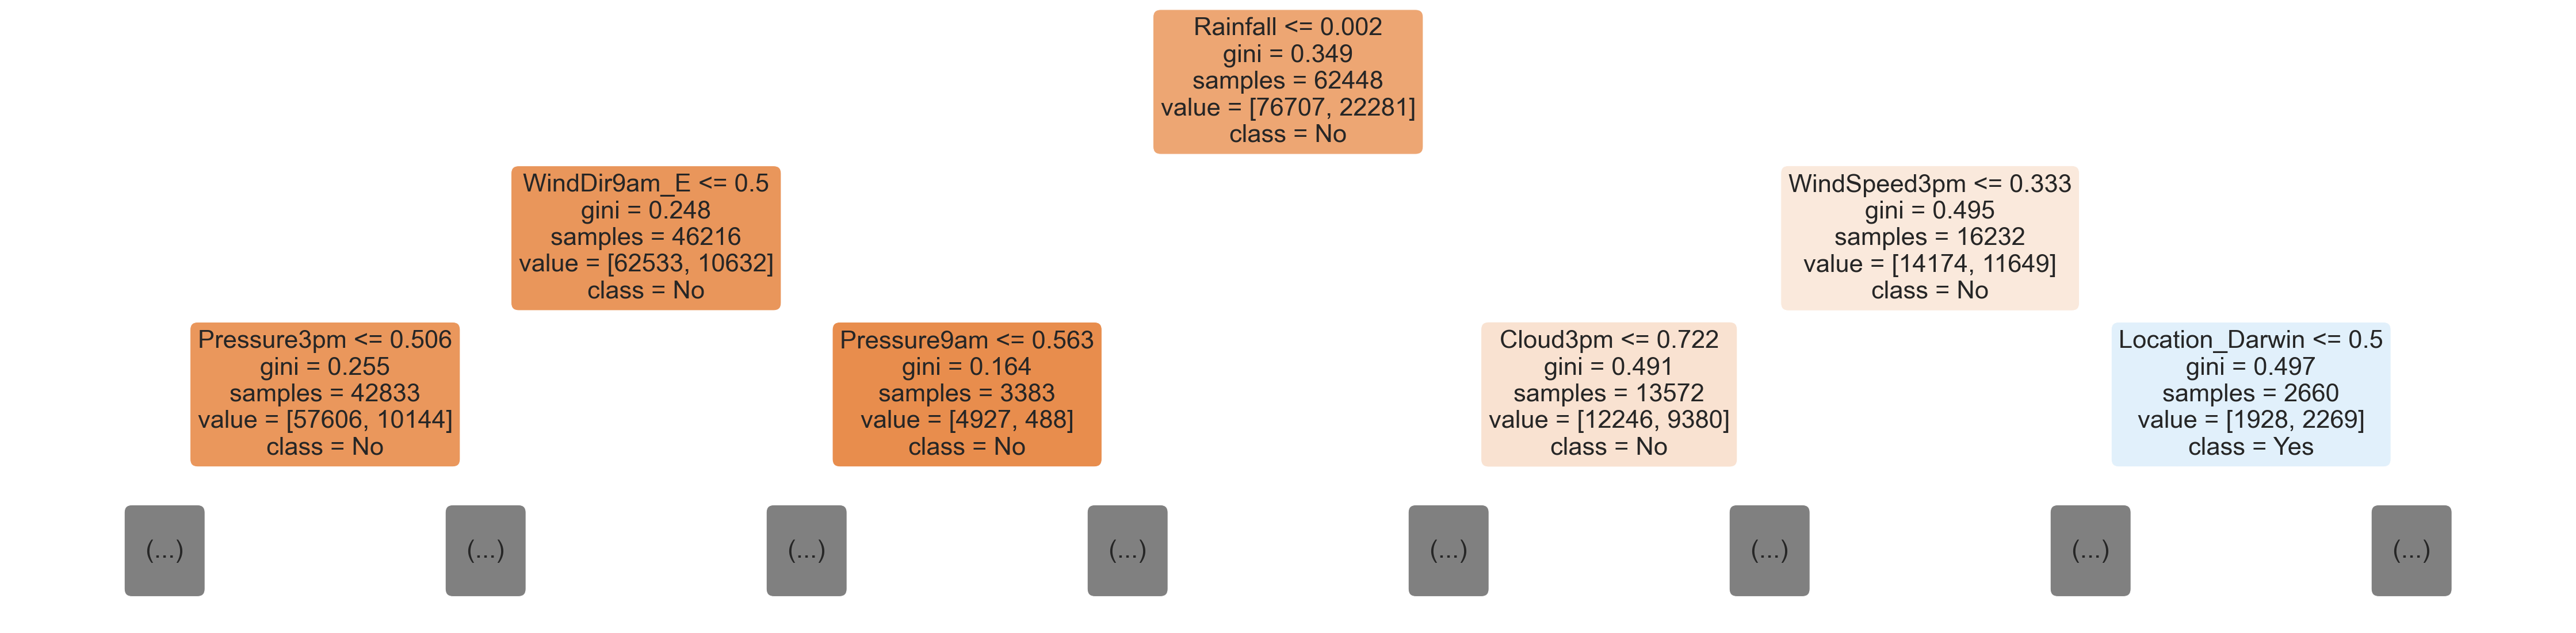

In [77]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[15], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_)

In [78]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [80]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.135151
2,Rainfall,0.056682
4,Sunshine,0.055973
11,Pressure3pm,0.053922
8,Humidity9am,0.050153
5,WindGustSpeed,0.047999
10,Pressure9am,0.047581
15,Temp3pm,0.044809
1,MaxTemp,0.042488
0,MinTemp,0.041462


<AxesSubplot:title={'center':'Feature importance'}, xlabel='importance', ylabel='feature'>

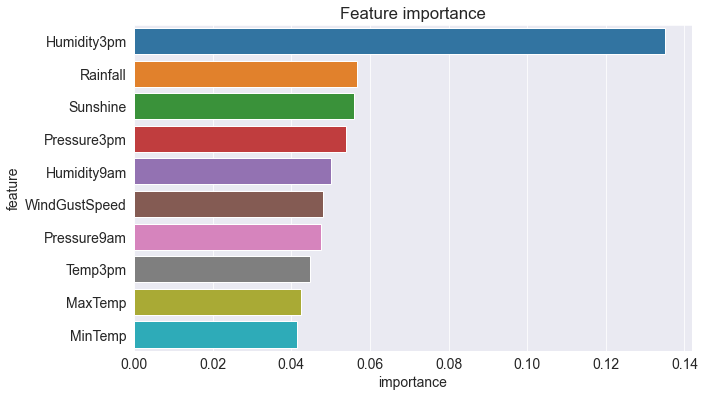

In [81]:
plt.title('Feature importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

## Hyperparameter Tuning with Random Forests

you can increase the number of layers in each decision tree, the number of decision trees for the forests and so on

In [83]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [91]:
def model_acc(model):
    base_train_acc = model.score(X_train, train_targets)
    base_val_acc = model.score(X_val, val_targets)
    return base_train_acc, base_val_acc

In [110]:
base_accs = model_acc(base_model)

### ``n_estimators`` hyperparameter

Controls the number of decision trees in the random forest. Default value of 100

Try to have as low amount of estimators as possible -> the more estimators the longer it takes

In [94]:
model_10_estimators = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10).fit(X_train, train_targets)

In [95]:
model_acc(model_10_estimators)

(0.9869075039398715, 0.8458592072427601)

In [98]:
model_400_estimators = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=400).fit(X_train, train_targets)

In [99]:
model_acc(model_400_estimators)

(0.9999797955307714, 0.8583947536416923)

### ``max_depth`` and ``max_leaft_nodes`` hyperparameter

This will be applied to every decision tree

In [100]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model_acc(model)

In [105]:
test_params(max_depth=26)

(0.9825130318826525, 0.8556671116011839)

In [106]:
test_params(max_depth=5)

(0.8250798076534529, 0.8297835296848703)

In [107]:
test_params(max_depth=15, max_leaf_nodes=2**15)

(0.8976037499494888, 0.8531716093088039)

### ``max_features`` hyperparameter

Instead of picking all features for every split, we can specify that only a fraction of features be chosen randomly to figure out a split

In [108]:
test_params(max_features='log2')

(0.9999595910615429, 0.8557831814752481)

In [113]:
test_params(max_features=32)

(0.9999494888269285, 0.8568278103418258)

In [111]:
base_accs

(0.9999595910615429, 0.8571760199640184)

### ``min_samples_split`` and ``min_samples_leaf`` hyperparameter

Minimum size for splitting a node and minimum size for a leaf node that is created when splitting a node

In [115]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8501838606699802, 0.8456270674946318)

In [121]:
test_params(min_impurity_decrease=1e-10)

(0.9999595910615429, 0.8562474609715048)

In [124]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8591492078231096)

In [127]:
test_params(class_weight='balanced')

(0.9999696932961571, 0.8542742731124137)

In [126]:
base_accs

(0.9999595910615429, 0.8571760199640184)